#인기태그 워드클라우드 상위,하위 10개 막대그래프

In [11]:
# 한글 다운로드 (후 런타임 다시시작 클릭 필수)
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
!pip install konlpy > /dev/null

In [55]:
# 모듈,패키지 불러오기
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
from PIL import Image # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import pandas as pd

from konlpy.tag import Okt, Kkma, Komoran


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# 파일 읽기
df = pd.read_excel('./middle4.xlsx')

In [57]:
df['별점 높은순 후기']

0       ['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...
1       ['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...
2       ['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...
3       ['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...
4       ['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...
                              ...                        
1201    ['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...
1202    ['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...
1203    ['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...
1204    ['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...
1205    ['독립된 화장실이 있어서 9만원 정도에 방을 잡았습니다. 늦은 시간에 예약했다지만...
Name: 별점 높은순 후기, Length: 1206, dtype: object

# 별점 높은순 후기 워드클라우드 상위,하위10개 막대그래프

In [58]:
# 기호처리
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(',','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('[','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(']','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace("'",'')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('"','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('\'','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('\\\\r','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('?','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('.','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace("!",'')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('~','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('~~','')
df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace("'",'')

<ipython-input-58-c58438450749>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('[','')
<ipython-input-58-c58438450749>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace(']','')
<ipython-input-58-c58438450749>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['별점 높은순 후기']=df['별점 높은순 후기'].str.replace('\\\\r','')
<ipython-input-58-c58438450749>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=

In [59]:
df['별점 높은순 후기']=df['별점 높은순 후기'].str.split()

In [60]:
stoptext = ''' 너무 수 있도록 너무 잘 쉬다 쉬다 갑니다 잘쉬다갑니다 잘쉬었습니다 깔끔하고 깨끗하고 좋습니다 잘 쉬다 이용해 주셔서 소중한 후기 저희 호텔을 좋아요 수 있도록 
좋았습니다 엄청 소중한 후기 이용해 주셔서 감사합니다 만족합니다 좋았어요 쉬다 갑니다 쉬었습니다 항상 잘쉬다가요 좋네요 정말 쉬다갑니다 좋아용 좋았고 편하게 좀 아주 조금 숙소
위치가 사장님 매우 다음에 또 진짜 안녕하세요 생각보다 근데 쉬다가 많이 가요 쉬다가요 매번 위치도 쉬고 잘쉬다 조아요 ㅎㅎ 그냥 그래도 있어서 다만 노력하겠습니다 감사합니다 하루 보내세요
없어서 더 좋음 더 나은 언제나 여기 감사드립니다 많은 이용 있고 것 같아요 이용 했습니다 하루 되세요 tt 다 잘쉬고갑니다 저희 호텔을 저희 호텔을 늘 완전 있는 방도 갑니당 왔어요 너무너무 다음에도
전체적으로 편히 자주 쉬 때 곳 자주 호텔 감사 다음 포레스타 모텔 굿 굿굿 객실 최고 노력 예약 방문 앞 고객 생각 용 습 포레 스타 서비스 제공 서비스제공 전체 방이 재 서울 애용 정도 의사 서비스보답
더욱 때문 안 바로 다른 거 역시 다시 무엇 오늘 체크 요 한번 처음 듯 위해 점 분 층 안녕하십니까 하나 박 말씀 모두 제일 님 역 담    
'''

In [61]:
tag_string1 = ' '.join([' '.join(tags) for tags in df['별점 높은순 후기']])

In [62]:
okt = Okt()

In [63]:
tokens = okt.nouns(tag_string1)

In [64]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

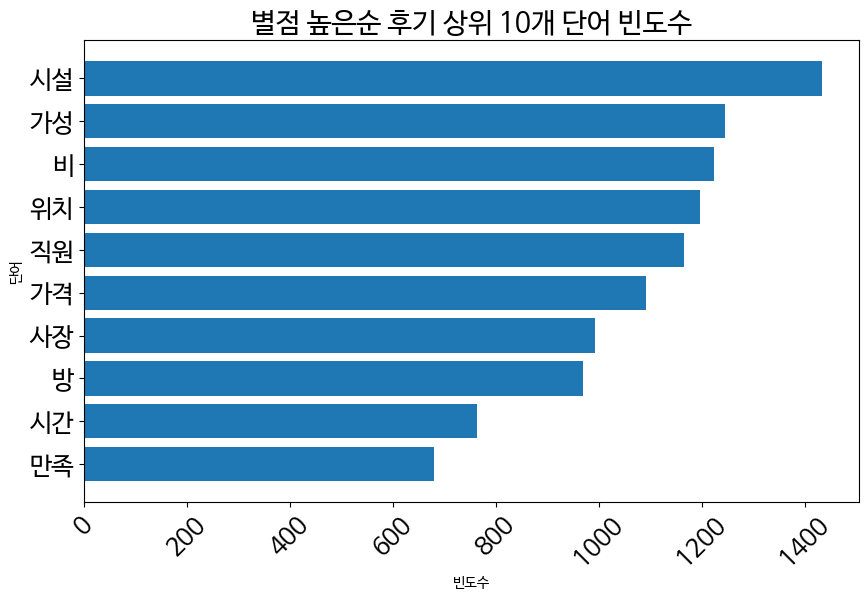

In [66]:
import matplotlib.pyplot as plt
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(tokens)

# 가장 빈도수가 높은 상위 10개 단어 추출
top_words = word_counts.most_common(10)

# 단어와 빈도수를 별도의 리스트로 분리
words, counts = zip(*top_words)

# 단어와 빈도수를 기준으로 내림차순 정렬
words_sorted, counts_sorted = zip(*sorted(zip(words, counts), key=lambda x: x[1], reverse=False))

# 바차트 그리기
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(words_sorted, counts_sorted)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('별점 높은순 후기 상위 10개 단어 빈도수', fontsize=20)
plt.xticks(rotation=45)
plt.show()

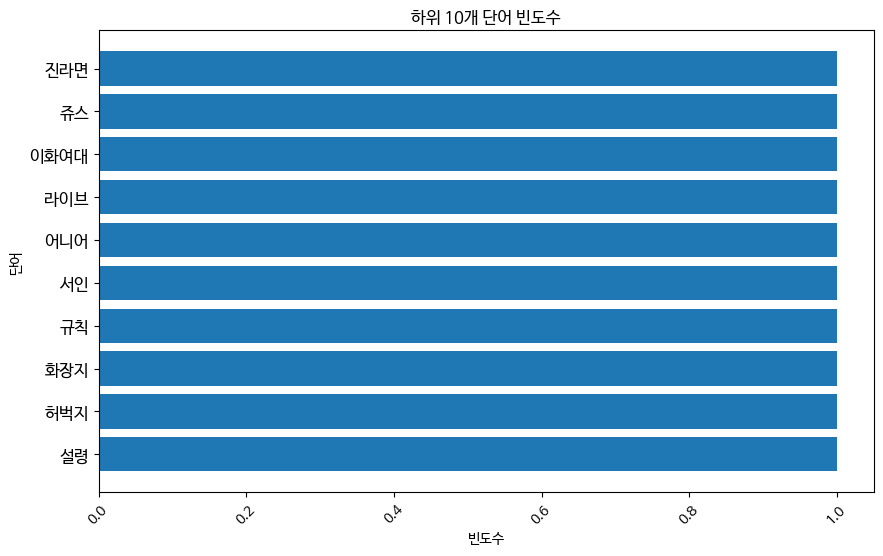

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(tokens)

# 가장 빈도수가 낮은 하위 10개 단어 추출
bottom_words = word_counts.most_common()[:-11:-1]

# 단어와 빈도수를 별도의 리스트로 분리
words, counts = zip(*bottom_words)

# 단어와 빈도수를 기준으로 오름차순 정렬
words_sorted, counts_sorted = zip(*sorted(zip(words, counts), key=lambda x: x[1]))

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.barh(words_sorted, counts_sorted)
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('하위 10개 단어 빈도수')
plt.xticks(rotation=45)
plt.show()

# 별점 낮은순 후기 워드클라우드 상위,하위10개 막대그래프

In [67]:
# 기호처리
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('고객님','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('노력하겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('보답해드리겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('부탁드리겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('이용해주셔서','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('대처하겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('앞으로도','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('불편한','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('죄송합니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('불편을','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('모시겠습니다','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('앞으로','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(',','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace("'",'')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('"','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('\'','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('\\\\r','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('?','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('.','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace("!",'')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('~','')
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('~~','')

<ipython-input-67-ff732e393f7e>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('[','')
<ipython-input-67-ff732e393f7e>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace(']','')
<ipython-input-67-ff732e393f7e>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.replace('\\\\r','')
<ipython-input-67-ff732e393f7e>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when re

In [68]:
# split 처리
df['별점 낮은순 후기']=df['별점 낮은순 후기'].str.split()

In [69]:
df['별점 낮은순 후기'] = df['별점 낮은순 후기'].astype(str)

In [70]:
stoptext = ''' 좋아요 안녕하세요 좋았습니다 불편을 드려 드려 죄송합니다 진짜 너무 그냥 정말 바로 계속 그리고 소중한후기 예약했는데 다른 다 좋았어요 좀 방 많이 객실 다시 그 더 감사합니다
했는데 있도록 그리고 다른 하고 안 바로 없고 왜 다시 계속 제대로 제가 방에 무슨 방이 방 저희가 그래서 ㅠㅠ 다시는 같은 하는 좀 이렇게 있도록 여기 다시는 바로 이용해 주셔서 이용해 주셔서
수 있도록 수 있도록 조금 있어서 호텔 ' 곳 예약 말 직원 숙박 한번 제 별로 정도 사용 점 함 분 도 거 저 뭐 모텔 다음 번 못 날 이  
'''

In [71]:
tag_string2 = ' '.join(df['별점 낮은순 후기'])

In [72]:
okt = Okt()

In [73]:
tokens = okt.nouns(tag_string1)

In [74]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

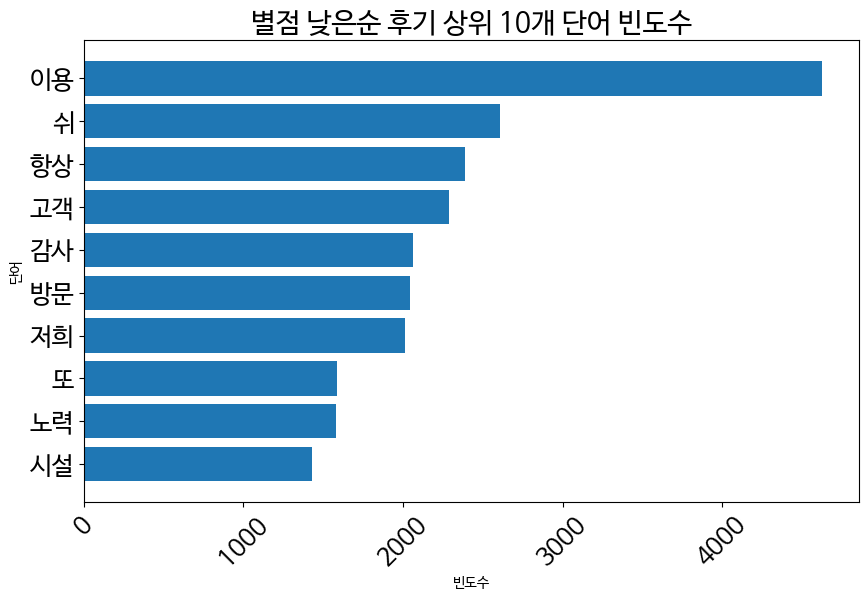

In [75]:
import matplotlib.pyplot as plt
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(tokens)

# 가장 빈도수가 높은 상위 10개 단어 추출
top_words = word_counts.most_common(10)

# 단어와 빈도수를 별도의 리스트로 분리
words, counts = zip(*top_words)

# 단어와 빈도수를 기준으로 내림차순 정렬
words_sorted, counts_sorted = zip(*sorted(zip(words, counts), key=lambda x: x[1], reverse=False))

# 바차트 그리기
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(words_sorted, counts_sorted)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('별점 낮은순 후기 상위 10개 단어 빈도수', fontsize=20)
plt.xticks(rotation=45)
plt.show()

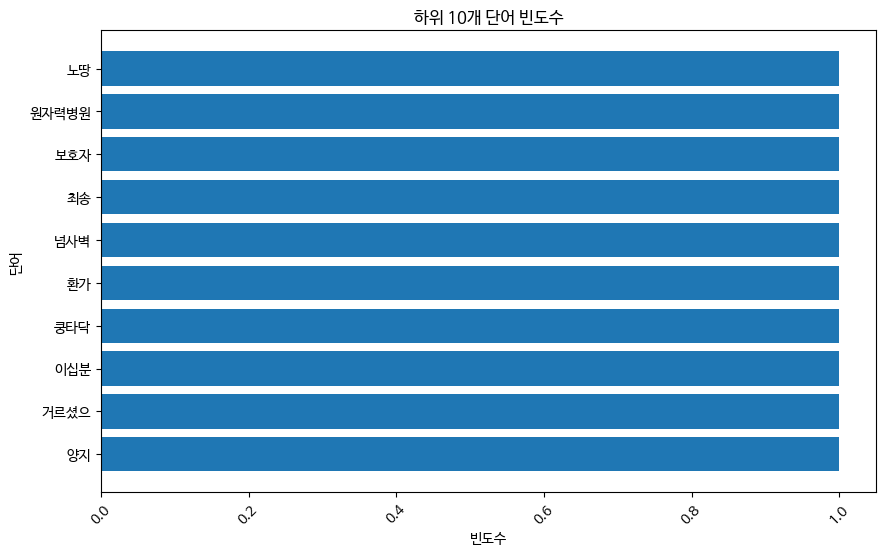

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(tokens)

# 가장 빈도수가 낮은 하위 10개 단어 추출
bottom_words = word_counts.most_common()[:-11:-1]

# 단어와 빈도수를 별도의 리스트로 분리
words, counts = zip(*bottom_words)

# 단어와 빈도수를 기준으로 오름차순 정렬
words_sorted, counts_sorted = zip(*sorted(zip(words, counts), key=lambda x: x[1]))

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.barh(words_sorted, counts_sorted)
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('하위 10개 단어 빈도수')
plt.xticks(rotation=45)
plt.show()

#인기시설 및 서비스, 별점 높은순 후기, 별점 낮은순 후기 합쳐서 워드클라우드 상위,하위10개 막대그래프

In [ ]:
# 인기테그 + 별점 낮은순 후기 + 별점 높은순 후기 합치기
df['인기테그,별점 낮은순 후기,별점 높은순 후기'] = df['인기테그'].astype(str) + df['별점 낮은순 후기'].astype(str) + df['별점 높은순 후기'].astype(str)

In [ ]:
wc4 = WordCloud(background_color='white', max_words=2000,font_path=font_path)
tag_string4 = ' '.join(df['인기테그,별점 낮은순 후기,별점 높은순 후기'])

In [ ]:
tokens = okt.nouns(tag_string4)

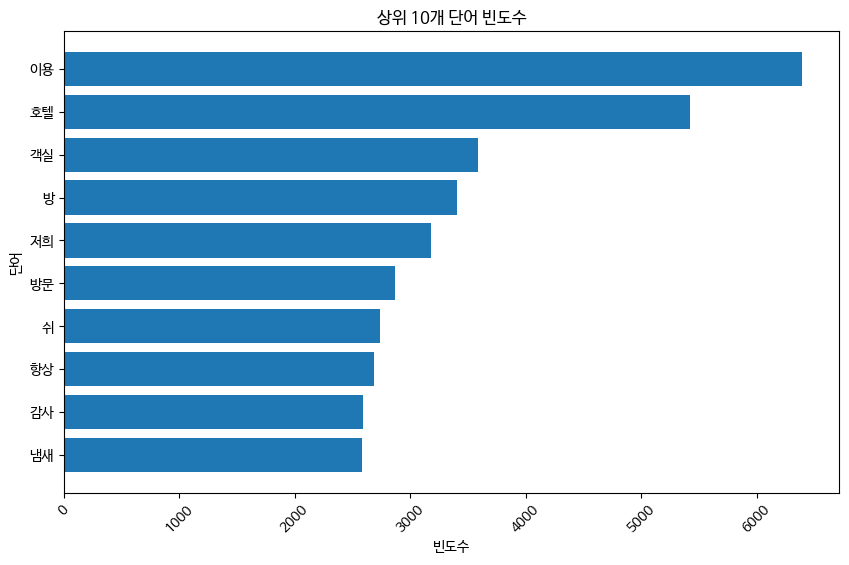

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(tokens)

# 가장 빈도수가 높은 상위 10개 단어 추출
top_words = word_counts.most_common(10)

# 단어와 빈도수를 별도의 리스트로 분리
words, counts = zip(*top_words)

# 단어와 빈도수를 기준으로 내림차순 정렬
words_sorted, counts_sorted = zip(*sorted(zip(words, counts), key=lambda x: x[1], reverse=False))

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.barh(words_sorted, counts_sorted)
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('상위 10개 단어 빈도수')
plt.xticks(rotation=45)
plt.show()

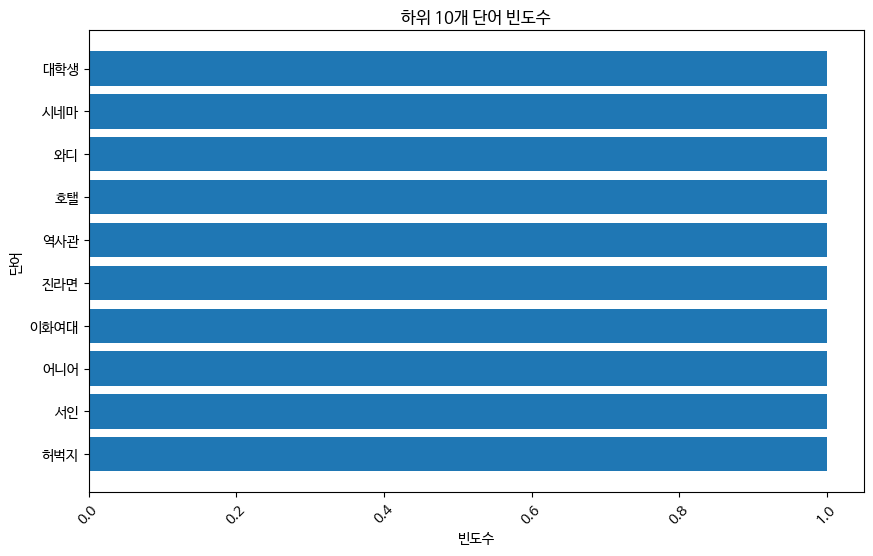

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(tokens)

# 가장 빈도수가 낮은 하위 10개 단어 추출
bottom_words = word_counts.most_common()[:-11:-1]

# 단어와 빈도수를 별도의 리스트로 분리
words, counts = zip(*bottom_words)

# 단어와 빈도수를 기준으로 오름차순 정렬
words_sorted, counts_sorted = zip(*sorted(zip(words, counts), key=lambda x: x[1]))

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.barh(words_sorted, counts_sorted)
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('하위 10개 단어 빈도수')
plt.xticks(rotation=45)
plt.show()